# Порядковые статистики
---
На этом занятии мы расширим наши возможности по оценке параметров распределений на порядковые статистики. Очень часто мы хотим нащупать пределы изменения СВ. Мы изучим распределение для $min(X_1, …, X_n)$ и $max(X_1, …, X_n)$ и научимся оценивать границы для равномерного распределения $R[a, b]$.

Построим новые распределения, которые нам пригодятся в дальнейшем - Хи-квадрат распределение, распределение Стьюдента и логнормальное распределение



> - Порядковые статистики
> - Оценка максимального правдоподобия для параметров a и b равномерного распределения;
> - Несмещенная оценка для параметров a и b равномерного распределения;
> - Хи-квадрат распределение
> - Логнормальное распределение

In [2]:
# импорт библиотек
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## **Порядковые статистики**
---
Пусть  в результате наблюдения некоторой СВ X мы получили выборку размером n: $$\bar X_n = (x_1, ..., x_n).$$

Перенумеруем эту выборку в порядке неубывания:

$$x_{i_1} \le x_{i_2}...\le x_{i_n}$$

Эта последовательность называется **вариационным рядом**. Вариационный ряд и его члены являются порядковыми статистиками. Случайная величина
$X_{i_k}$ называется k-ой порядковой статистикой исходной выборки.

Порядковые статистики являются основой непараметрических методов



**Замечание.** В будущем учтем, что
- $X_{i_1} = min(X_1, ..., X_n)$
- $X_{i_n} = max(X_1, ..., X_n)$

## Плотность распределения порядковой статистики
---
Пусть НСВ **X** подчиняется некоторому закону распределения с плотностью $f_X(x)$ и функцией распределения $F_X(x)=P(X \le x)$.

Тогда плотность распределения для порядковой статистики $X_{i_n}$ - выборочного максимума - будет иметь вид:

$$f_{X_{i_n}}(x) = n \cdot P(X_{i_1} \le x) \cdot P(X_{i_2} \le x) ...\cdot P(X_{i_{n-1}} \le x) \cdot P(X_{i_n} = x)$$
или
$$f_{X_{i_n}}(x) = n \cdot F_X^{n-1}(x) \cdot f_X(x)$$

Аналогично, плотность распределения для минимума выборки будет равна:
$$f_{X_{i_1}}(x) = n \cdot P(X_{i_2} \gt x) \cdot P(X_{i_3} \gt x) ...\cdot P(X_{i_{n}} \gt x) \cdot P(X_{i_n} = x)$$
или
$$f_{X_{i_n}}(x) = n \cdot (1 - F_X(x))^{n-1} \cdot f_X(x)$$

Убедимся, что эти формулы верны аналитически и экспериментально



**Аналитически** удостоверимся, что это плотность, т.е. выполняется условие нормировки, например, для максимума:

$$\int_{-\infty}^{+\infty} f_{X_{i_n}}(x) dx = n \cdot \int_{-\infty}^{+\infty} F_X^{n-1}(x) \cdot f_X(x) dx$$

Так как $f_X(x) = \frac {dF_X(x)}{dx}$, то $dF_X(x) = f_X(x) dx$ и делаем замену переменной:
$$y=F_X(x): y=0 \text{ при } x → -\infty; \; y=1 \text{ при } x → +\infty$$

$$n \cdot \int_{-\infty}^{+\infty} F_X^{n-1}(x) \cdot f_X(x) dx = n \cdot \int_{-\infty}^{+\infty} F_X^{n-1}(x) \cdot dF_X(x) = |y=F_X(x)| = n \cdot \int_0^1 y^{n-1} dy = y^n |_0^1 = 1$$

Кстати, видим, что функция распределения максимума имеет совсем простой вид:
$$F_{X_{i_n}}(x) = \int_{-\infty}^{x} f_{X_{i_n}}(x) dx = (F_X(x))^n |_{-\infty}^x = (F_X(x))^n$$


Аналогично для минимума имеем:

$$\int_{-\infty}^{+\infty} f_{X_{i_1}}(x) dx = n \cdot \int_{-\infty}^{+\infty} (1 - F_X(x))^{n-1} \cdot f_X(x) dx$$

Используем $dF_X(x) = f_X(x) dx$ и делаем замену переменной
$$y=F_X(x): y=0 \text{ при } x → -\infty; \; y=1 \text{ при } x → +\infty$$

$$n \cdot \int_{-\infty}^{+\infty} (1 - F_X(x))^{n-1} \cdot dF_X(x) = |y=F_X(x)| = n \cdot \int_0^1 (1-y)^{n-1} dy = - (1 - y)^n |_0^1 = 1$$

Функция распределения минимума имеет вид:
$$F_{X_{i_1}}(x) = \int_{-\infty}^{x} f_{X_{i_1}}(x) dx = -(1 - F_X(x))^n |_{-\infty}^x = -(1 - F_X(x))^n + 1 = 1 - (1 - F_X(x))^n$$

**Проверим формулу для случая равномерного распределения**

Пусть СВ подчиняется равномерному закону распределения на отрезке [a, b]: $X \in R[a, b]$.

Плотность равномерного распределения с параметрами $a,b$ имеет вид (см. TV_Lesson06):

$$f_X(x) =
  \begin{cases}
    0,  & \quad x < a \\
    \frac {1}{b-a},  & \quad a \leq x \leq b \\
    0,  & \quad t > b \\
  \end{cases}
$$

Функция равномерного распределения с параметрами $a,b$ имеет вид (см. TV_Lesson06):

$$F_X(x) = p(X < x) =
  \begin{cases}
    0,  & \quad x < a \\
    \frac {x-a}{b-a},  & \quad a \leq x \leq b \\
    1,  & \quad x > b \\
  \end{cases}
$$

Тогда плотность для максимума выборки размера n будет иметь вид:

$$f_{X_{i_n}}(x) =
  \begin{cases}
    0,  & \quad x < a \\
    \frac {1}{b-a} \cdot (\frac {x-a}{b-a})^{n-1},  & \quad a \leq x \leq b \\
    0,  & \quad t > b \\
  \end{cases}
$$

Подтвердим **экспериментально** данный вывод.

Для этого сгенерируем **N** выборок размера **n** для равномерно распределенной СВ X и построим эмпирическое распределение. Сравним его с теоретическим графически.

In [3]:
# сгенерируем N выборок размером n для R(a,b)
a = 0
b = 5
n = 10
N = 100

rv = stat.uniform()

res_lst = []
for _ in range(N):
    res = a + rv.rvs(size=n) * (b - a)
    res_lst.append(res)

Xres = np.array(res_lst)
Xres.shape

(100, 10)

In [4]:
Xmax = Xres.max(axis=1)
Xmax.min(), Xmax.max()

(2.745130013575914, 4.997010845374788)

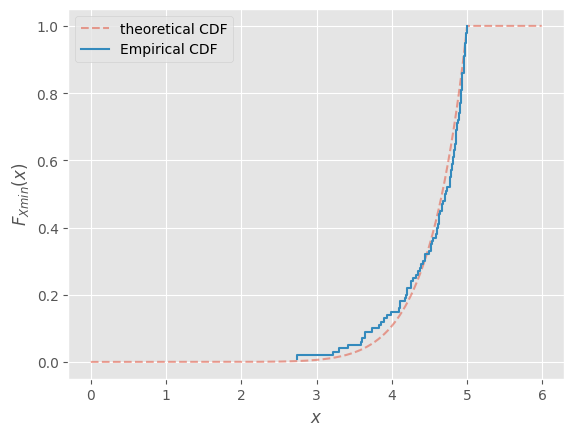

In [5]:
# построим графики эмпирического и теоретического распределения
x = np.arange(a, b+1, 0.01)

tPDF = lambda x: n * rv.pdf((x-a)/(b-a)) * rv.cdf((x-a)/(b-a))**(n-1)
tCDF = lambda x: rv.cdf((x-a)/(b-a))**n
plt.plot(x, tCDF(x), '--',  label='theoretical CDF', alpha=0.5)

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(Xmax)
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')

plt.ylabel('$F_{Xmin}(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

## **Оценка максимального правдоподобия для параметров равномерного распределения**
---


Для выборки размера n для СВ $X \in R[a, b]$ имеем :

$$L(a, b| \bar X) = ∏_{i=1}^n {f_X(x_i, a, b)} = ∏_{i=1}^n \frac {1}{b-a} = \frac {1}{(b-a)^n}$$

Логарифм от функции правдоподобия:

$$\log L(a, b | \bar X) = - n \cdot log(b-a)$$

Производная по параметру **a**:
$$\frac {∂\log L(a, b | \bar X)} {∂a} = \frac {n}{b-a}$$

Производная по параметру **b**:
$$\frac {∂\log L(a, b | \bar X)} {∂b} = - \frac {n}{b-a}$$

Нам надо получить максимум функции правдоподобия (логарифм правдоподобия), значит надо двигаться в сторону возрастания функции, т.е. если производная положительная в направлении a, то a надо увеличивать. Но самое максимальное a - это выбюорочный минимум:

$$a^{ML} = min(X_1, .., X_n)$$

Если же производная вдоль направоления отрицательная, то надо уменьшать параметр b. Самый минимальный параметр b - это выборочный максимум:

$$b^{ML} = max(X_1, .., X_n)$$



## **Несмещенная оценка для максимума/минимума**
---


Давайте вычислим мат.ожидание для оценок максимального правдоподобия для параметров $a, b$.

так как $f_{b^{ML}}(x) = f_{X_{i_n}}(x)$, то

$$M[b^{ML}] = \int_{-\infty}^{+\infty} x \cdot f_{X_{i_n}}(x) dx = n \cdot \int_{a}^{b} x \cdot F_X^{n-1}(x) \cdot f_X(x) dx = n \cdot \int_{a}^{b} x \cdot F_X^{n-1}(x) \cdot dF_X(x) = \int_{a}^{b} x \cdot d(F_X(x))^n$$

Вычислим этот интеграл по частям:

$$\int U dV = UV - \int V dU$$

Получим:
$$\int_{a}^{b} x \cdot d(F_X(x))^n = x \cdot (F_X(x))^n |_a^b - \int_{a}^{b} (F_X(x))^n \cdot dx = x \cdot (\frac {x-a}{b-a})^n |_a^b - \int_{a}^{b} (\frac {x-a}{b-a})^n \cdot dx = b - (\frac {1}{b-a})^n \int_{a}^{b} (x - a)^n d(x-a) = b - (\frac {1}{b-a})^n \frac {1}{n+1} \cdot (x - a)^{n+1}|_a^b = b - \frac {b-a}{n+1}$$

т.е. видим, что данная оценка является только ассимптотически несмещенной:
$$M[b^{ML}] = b - \frac {b-a}{n+1}$$

Аналогично можно вывести МО для оценки a:
$$M[a^{ML}] = a + \frac {b-a}{n+1}$$



Несмещенные оценки можно получить, скорректировав оценки максимального правдоподобия:

$$\hat a = a^{ML} - \frac {b^{ML} - a^{ML}}{n+1}$$

$$\hat b = b^{ML} + \frac {b^{ML} - a^{ML}}{n+1}$$

Покажем это экспериментально:
1. Сгенерируем большое кол-во N выборок размера n,
2. Найдем для каждой выборки оценки a и b (ML и скорректированные)
3. Найдем их МО (среднее)
4. Построим зависимости МО от размера выборки n

In [24]:
# Нарисуем плотность распределения для R(a,b)
a = 0
b = 5

def calc_ab_estim(n, N=100):
    uniform_rv = stat.uniform()
    res_lst = []
    for _ in range(N):
        res = a + rv.rvs(size=n) * (b - a)
        res_lst.append(res)
    Xres = np.array(res_lst)
    ML_a = Xres.min(axis=1)
    ML_b = Xres.max(axis=1)
    corr_a = ML_a - (ML_b - ML_a) / (n+1)
    corr_b = ML_b + (ML_b - ML_a) / (n+1)
    return ML_a, ML_b, corr_a, corr_b

ML_a, ML_b, corr_a, corr_b = calc_ab_estim(n=10)
ML_a.mean(), ML_b.mean(), corr_a.mean(), corr_b.mean()

(0.4609302103359013,
 4.4862074458954995,
 0.09499591619411951,
 4.852141740037282)

In [27]:
n_i = list(range(2, 20))
ML_a_lst, ML_b_lst, corr_a_lst, corr_b_lst  = [], [], [], []
for n in n_i:
    ML_a, ML_b, corr_a, corr_b = calc_ab_estim(n, N=200)
    ML_a_lst.append(ML_a.mean())
    ML_b_lst.append(ML_b.mean())
    corr_a_lst.append(corr_a.mean())
    corr_b_lst.append(corr_b.mean())

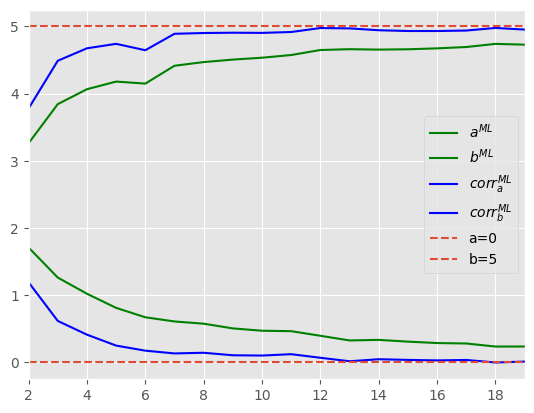

In [28]:
plt.plot(n_i, ML_a_lst, c='green', label='$a^{ML}$')
plt.plot(n_i, ML_b_lst, c='green', label='$b^{ML}$')
plt.plot(n_i, corr_a_lst, c='blue', label='$corr_a^{ML}$')
plt.plot(n_i, corr_b_lst, c='blue', label='$corr_b^{ML}$')
plt.hlines(a, xmin=min(n_i), xmax=max(n_i), linestyles='--', label=f'a={a}')
plt.hlines(b, xmin=min(n_i), xmax=max(n_i), linestyles='--', label=f'b={b}')
plt.xlim(left=min(n_i), right=max(n_i))
plt.legend()
plt.show()

### ЗАДАНИЕ на сравнение оценок
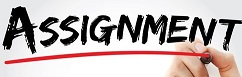

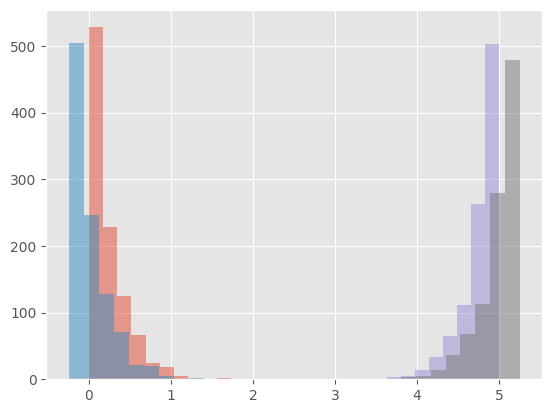

In [32]:
ML_a, ML_b, corr_a, corr_b = calc_ab_estim(n, N=1000)

plt.hist(ML_a, alpha=0.5)
plt.hist(corr_a, alpha=0.5)
plt.hist(ML_b, alpha=0.5)
plt.hist(corr_b, alpha=0.5)
plt.show()

На рисунке мы видим гистограммы распределений для оценок параметров a, b равномерного распределения.
Но при рисовании гистограмм забыли указать дегенду. Помогите восстановить потерянную информацию. Какая из этих гистограмм распределений какой оценке соответствует?

ВАРИАНТЫ ОТВЕТОВ:
1. Синяя соответствует оценке $a^{ML}$, красная - оценке $a^{ML}_{corr}$, фиолетовая - оценке $b^{ML}$, серая - оценке $b^{ML}_{corr}$
1. Синяя соответствует оценке $a^{ML}_{corr}$, красная - оценке $a^{ML}$, фиолетовая - оценке $b^{ML}$, серая - оценке $b^{ML}_{corr}$
1. Синяя соответствует оценке $a^{ML}_{corr}$, красная - оценке $a^{ML}$, фиолетовая - оценке $b^{ML}_{corr}$, серая - оценке $b^{ML}$
1. Синяя соответствует оценке $a^{ML}$, красная - оценке $a^{ML}_{corr}$, фиолетовая - оценке $b^{ML}_{corr}$, серая - оценке $b^{ML}$



## Равномерное распределение. Распределение Симпсона. Нормальное распределение
---

Наряду с равномерным и нормальным распределение часто используют распределение Симпсона как некоторый промежуточный случай. Покажем как эти распределения получаются из равномерного сначала экспериментально, а затем и теоретически выведем формулу для Симпсона.

Рассмотрим сумму двух равномерно распределенных величин:
$$X_1 \in R[0,1], \; X_2 \in R[0,1], \; Y = X_1 + X_2$$

Построим эмпирическое распределение для СВ Y

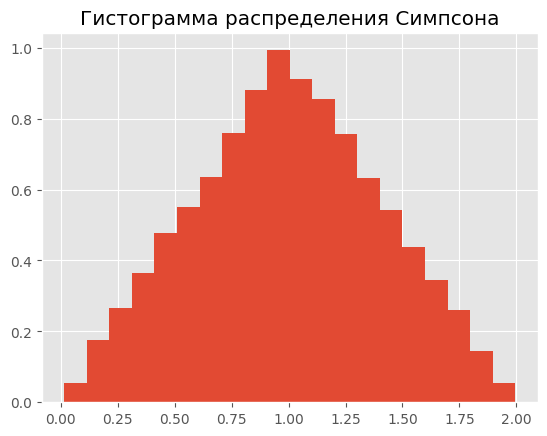

In [51]:
# Нарисуем плотность распределения для Xi in R(a,b) и Y = X1 + X2
n = 10000

rv1 = stat.uniform()
rv2 = stat.uniform()

X1 = rv1.rvs(size=n)
X2 = rv1.rvs(size=n)

Y = X1 + X2
plt.title(f"Гистограмма распределения Симпсона")
plt.hist(Y, bins=20, density=True);

А теперь рассмотрим как будет распределена СВ $Y = X_1 + X_2 + .. + X_N$ в зависимости от N

In [41]:
# сгенерируем выборки размером n для N СВ, распределенных равномерно R(0,1)
n = 5000

def gen_uniform(N, n=5000):
    rv = stat.uniform()
    res_lst = []
    for _ in range(N):
        res = rv.rvs(size=n)
        res_lst.append(res)
    Xres = np.array(res_lst)
    return Xres

Xres = gen_uniform(3)
Xres.shape

(3, 5000)

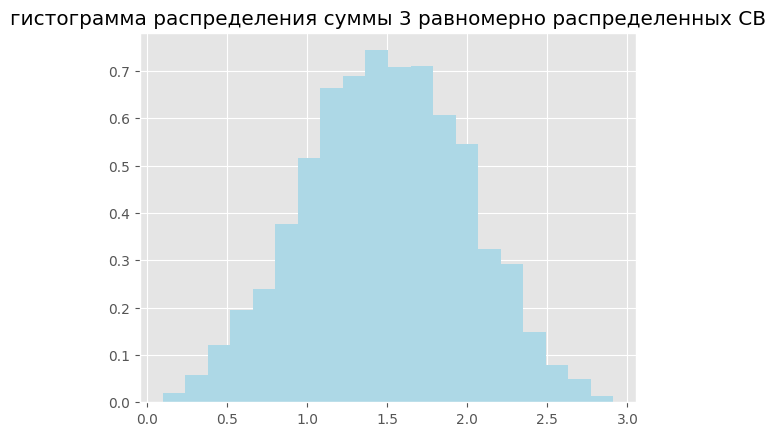

In [58]:
N=3
Xres = gen_uniform(N)
Y = Xres.sum(axis=0)
plt.title(f"гистограмма распределения суммы {N} равномерно распределенных СВ")
plt.hist(Y, bins=20, color='lightblue', density=True);

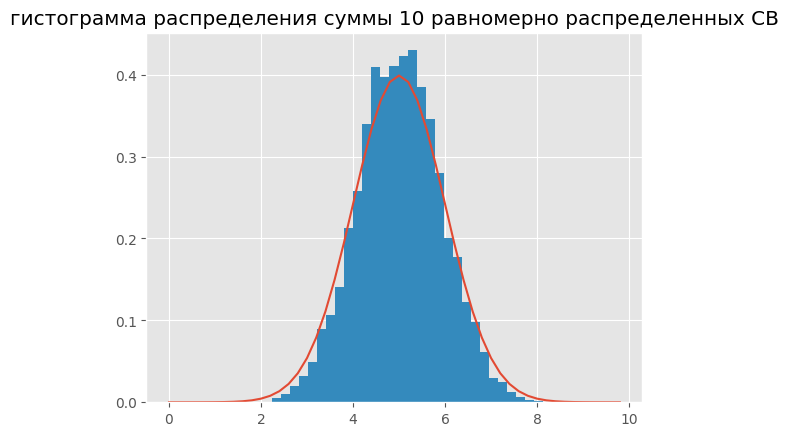

In [54]:
N=10
x_i = np.arange(0., N, 0.2)
Xres = gen_uniform(N)
Y = Xres.sum(axis=0)
norm_rv = stat.norm(loc=N/2, scale=1)
plt.title(f"гистограмма распределения суммы {N} равномерно распределенных СВ")
plt.plot(x_i, norm_rv.pdf(x_i), label='плотность нормального распределения')
plt.hist(Y, bins=30, density=True);

## Логнормальное и Хи-квадрат распределение
---

Если СВ Y формировать не как сумму, а как произведение большого кол-ва СВ, то получим логнормальное распределение. Он так называется потому, что логарифм $log(Y)$ будет нормально распределена.

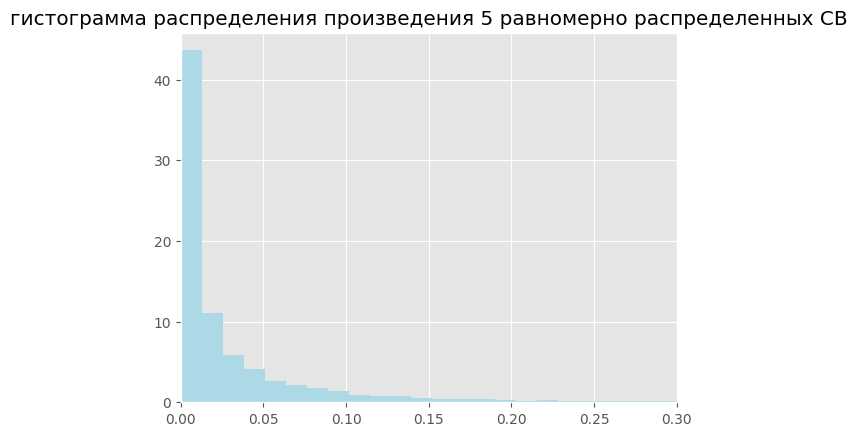

In [63]:
N=5
Xres = gen_uniform(N, n=10000)
Y = Xres.prod(axis=0)
plt.title(f"гистограмма распределения произведения {N} равномерно распределенных СВ")
plt.xlim(0, 0.3)
plt.hist(Y, bins=50, color='lightblue', density=True);

## Хи-квадрат распределение с n степенями свободы
---

Это распределение получится, если мы будем суммировать n нормально распределенных СВ

In [ ]:
def gen_norm(N, n=500):
    rv = stat.norm()
    res_lst = []
    for _ in range(N):
        res = rv.rvs(size=n)
        res_lst.append(res)
    Xres = np.array(res_lst)
    return Xres

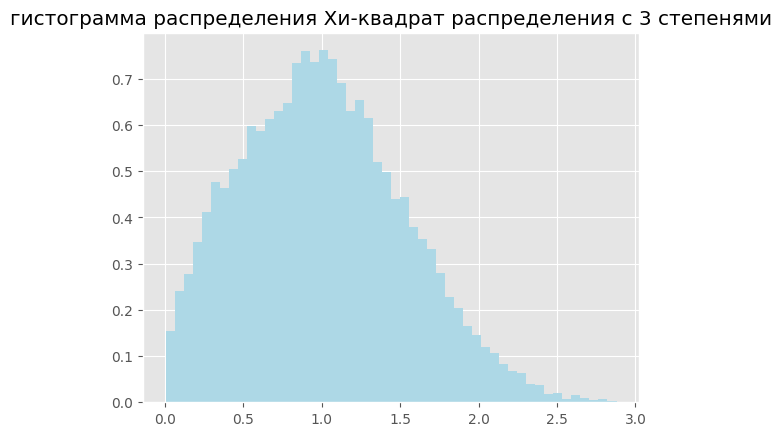

In [66]:
N=3
Xres = gen_uniform(N, n=10000)
X2res = Xres * Xres
Y = X2res.sum(axis=0)
plt.title(f"гистограмма распределения Хи-квадрат распределения с {N} степенями")
plt.hist(Y, bins=50, color='lightblue', density=True);

## **Resume**
---
